In [97]:
from mysql import connector
from matplotlib import pyplot as plt

In [98]:
id = 5
params = {'host': '127.0.0.1', 'user': 'root', 'password': 'T0_Gather', 'database': 'NAVKA2'}
con = connector.connect(**params)
cursor = con.cursor()

## Визуализация каскадов

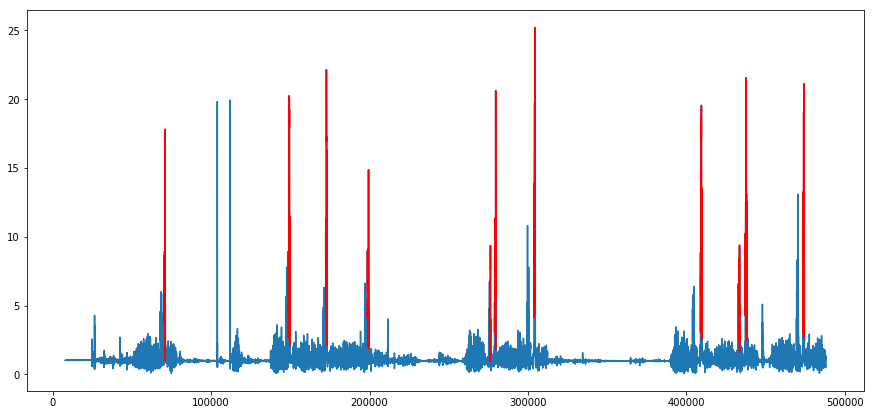

In [99]:
cursor.execute(f"SELECT tick, SQRT(x*x+y*y+z*z) FROM vAcc")
data = pd.DataFrame(cursor.fetchall())
cursor.execute(f"SELECT t0, tn FROM Cscds WHERE sid ={id}")
rows = cursor.fetchall()

plt.figure(figsize=(15,7))
plt.plot(data[0],data[1])

for r in rows:
    t0, tn = r
    i_to_del = [i for i in range(t0,tn)]
    dat_plot = data.loc[i_to_del]
    plt.plot(dat_plot[0],dat_plot[1], 'r')


## Визуализация прыжков

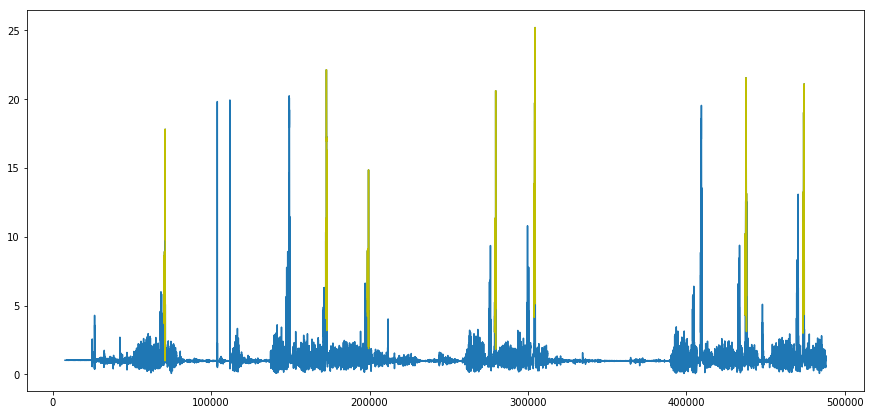

In [100]:
cursor = con.cursor()
cursor.execute(f"SELECT jid,t0,tn FROM Jmps JOIN Cscds ON Jmps.cid=Cscds.cid WHERE Cscds.sid={id};")

plt.figure(figsize=(15,7))
plt.plot(data[0],data[1])

for j in cursor.fetchall():
    cursor.execute(f"SELECT tick,a FROM vJmps WHERE jid={j[0]};")
    dpl = pd.DataFrame(cursor.fetchall())
    plt.plot(dpl[0],dpl[1], 'y')
    